In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("./어벤져스.txt", header=None, names=["title", "score", "review", "date"])
data = data[data.review.notnull()]
data = data.drop_duplicates()

In [2]:
from collections import defaultdict
from konlpy.tag import Komoran

ma = Komoran()

documents = defaultdict(list)
vocabulary = list()

for i, review in zip(data.index, data.review):
    for term in [_ for _ in ma.nouns(review) if 1 < len(_) < 8]:
        documents[i].append(term)
        vocabulary.extend(documents[i])
        
vocabulary = list(set(vocabulary))

In [3]:
from random import random

def getTheta(topic, docName):
    return docTopicDistribution[docName][topic] + a

def getPhi(term, topic):
    return (topicTermDistribution[topic][term] + b) / (topicTermCount[topic] + V * b)

def topicAssignment(docName, term, topic):
    return getTheta(topic, docName) * getPhi(term, topic)

def collapsedGibbsSampling(docName, term):
    return randomSampling([topicAssignment(docName, term, topic) for topic in range(K)])

def randomSampling(topicProbabilites):
    topicSum = sum(topicProbabilites)
    
    rnd = topicSum * random()

    for i, p in enumerate(topicProbabilites):
        rnd -= p
        
        if rnd <= 0:
            return i

In [4]:
K = 6

M = len(documents)
V = len(vocabulary)

a = 1.0
b = 0.1

docTermCount = defaultdict(int)
topicTermCount = defaultdict(int)
docTopicDistribution = defaultdict(lambda: defaultdict(int))
topicTermDistribution = defaultdict(lambda: defaultdict(int))
termTopicAssignmentMatrix = defaultdict(lambda: defaultdict(int))

In [5]:
from random import randrange

for docName, termList in documents.items():
    for termIdx, term in enumerate(termList):
        topic = randrange(K)
        
        docTermCount[docName] += 1
        topicTermCount[topic] += 1
        docTopicDistribution[docName][topic] += 1
        topicTermDistribution[topic][term] += 1
        
        termTopicAssignmentMatrix[docName][termIdx] = topic

In [6]:
iteration = 1000

for _ in range(iteration):
    for docName, termList in documents.items():
        for termIdx, term in enumerate(termList):
            topic = termTopicAssignmentMatrix[docName][termIdx]
            
            docTermCount[docName] -= 1
            topicTermCount[topic] -= 1
            docTopicDistribution[docName][topic] -= 1
            topicTermDistribution[topic][term] -= 1
            
            topic = collapsedGibbsSampling(docName, term)
            termTopicAssignmentMatrix[docName][termIdx] = topic
            
            docTermCount[docName] += 1
            topicTermCount[topic] += 1
            docTopicDistribution[docName][topic] += 1
            topicTermDistribution[topic][term] += 1
            
    if _%100 == 0:
        print("{0:2.0f}%".format(_/10))

 0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

path = "/Libray/Fonts/AppleGothic.ttf"

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "AppleGothic"

def drawCloud(words, title):
    wc = WordCloud(font_path=path, max_words=30, background_color="white")
    wc.generate_from_frequencies(words)
    plt.imshow(wc.to_array())
    plt.title(title)
    plt.axis("off")
    plt.show()

[('아이언맨', 1423), ('만큼', 989), ('캡틴', 480), ('어벤져스', 396), ('마블', 361), ('토르', 272), ('사랑', 272), ('사랑해', 270), ('시작', 262), ('사랑합니다', 243), ('사랑해요', 239), ('토니', 234), ('타노스', 199), ('아이', 136), ('스타크', 104), ('아메리카', 103), ('이다', 88), ('영웅', 81), ('굿바이', 81), ('블랙', 81)]


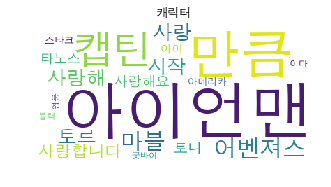

[('기대', 636), ('장면', 362), ('액션', 326), ('마지막', 299), ('스토리', 284), ('시간', 260), ('느낌', 250), ('생각', 238), ('이상', 187), ('전투', 178), ('중간', 175), ('부분', 141), ('타임', 141), ('결말', 140), ('내용', 134), ('정도', 129), ('초반', 128), ('인피', 119), ('실망', 118), ('마무리', 116)]


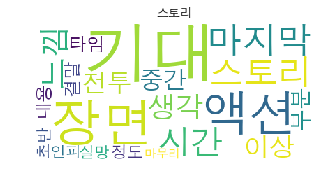

[('영화', 1896), ('최고', 1829), ('마블', 882), ('!!', 730), ('인생', 603), ('필요', 497), ('역대', 369), ('!!!', 317), ('대박', 211), ('쿠키', 149), ('진짜', 143), ('이건', 136), ('영상', 134), ('완전', 104), ('니다', 89), ('정말', 84), ('명작', 83), ('세번', 75), ('대작', 62), ('보세', 57)]


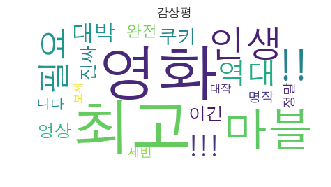

[('시간', 1434), ('영화', 1377), ('스포', 506), ('사람', 374), ('생각', 232), ('처음', 211), ('평점', 180), ('정도', 153), ('영화관', 149), ('화장실', 147), ('오늘', 124), ('동안', 118), ('개봉', 99), ('마음', 95), ('극장', 89), ('후회', 88), ('안보', 85), ('추천', 85), ('관람', 78), ('한번', 68)]


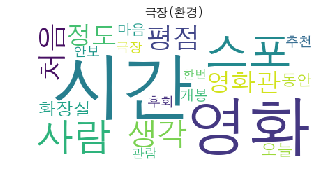

[('감동', 770), ('어벤져스', 724), ('마지막', 620), ('눈물', 527), ('영화', 506), ('히어로', 490), ('게임', 468), ('엔드', 408), ('마블', 395), ('소름', 383), ('시리즈', 340), ('여운', 253), ('재미', 243), ('전율', 157), ('처음', 147), ('어벤저스', 133), ('자체', 91), ('가슴', 89), ('인피', 79), ('이번', 77)]


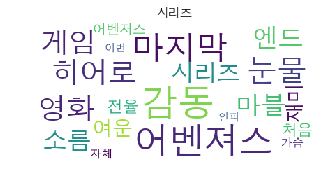

[('마블', 1326), ('마무리', 725), ('감사', 554), ('영화', 520), ('완벽', 469), ('10년', 344), ('어벤져스', 336), ('행복', 316), ('동안', 242), ('그동안', 225), ('11년', 208), ('선물', 194), ('추억', 161), ('시리즈', 153), ('20대', 130), ('안녕', 129), ('작품', 124), ('역사', 116), ('배우', 111), ('기억', 96)]


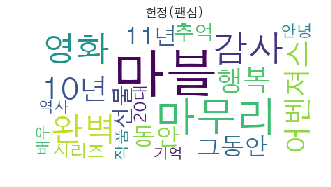

In [100]:
topicTitle = ["캐릭터", "스토리", "감상평", "극장(환경)", "시리즈", "헌정(팬심)"]

for topic in range(K):
    topicWords = sorted(topicTermDistribution[topic].items(), key=lambda x:x[1], reverse=True)[:20]
    print(topicWords)
    drawCloud(dict(topicWords), topicTitle[topic])

In [10]:
TDM = defaultdict(lambda: defaultdict(int))

for docName, termList in documents.items():
    for term in termList:
        TDM[term][docName] += 1

In [19]:
from math import log

pSeeds = ["감사", "완벽", "행복"]
nSeeds = ["화장실", "실망", "후회"]

N = len(documents)
smoothing = 0.1

positivePMI = defaultdict(lambda: defaultdict(float))
positiveNPMI = defaultdict(lambda: defaultdict(float))

negativePMI = defaultdict(lambda: defaultdict(float))
negativeNPMI = defaultdict(lambda: defaultdict(float))

for seed in pSeeds:
    seedDocList = set(list(TDM[seed].keys()))
    seedLikelihood = len(seedDocList)/N

    for term in vocabulary:
        termDocList = list(TDM[term].keys())
        termLikelihood = len(termDocList)/N

        jointLikelihood = (len(seedDocList.intersection(termDocList)) + smoothing)/N
        multiLikelihood = seedLikelihood * termLikelihood

        positivePMI[term][seed] = log(jointLikelihood/multiLikelihood)
        positiveNPMI[term][seed] = positivePMI[term][seed]/-log(jointLikelihood)
        

for seed in nSeeds:
    seedDocList = set(list(TDM[seed].keys()))
    seedLikelihood = len(seedDocList)/N

    for term in vocabulary:
        termDocList = list(TDM[term].keys())
        termLikelihood = len(termDocList)/N

        jointLikelihood = (len(seedDocList.intersection(termDocList)) + smoothing)/N
        multiLikelihood = seedLikelihood * termLikelihood

        negativePMI[term][seed] = log(jointLikelihood/multiLikelihood)
        negativeNPMI[term][seed] = negativePMI[term][seed]/-log(jointLikelihood)

In [20]:
pmiSO = defaultdict(float)
npmiSO = defaultdict(float)

for term in vocabulary:
    positivePmiSum = 0.0
    positiveNpmiSum = 0.0
    
    negativePmiSum = 0.0
    negativeNpmiSum = 0.0    
    
    for seed in pSeeds:
        positivePmiSum += positivePMI[term][seed]
        positiveNpmiSum += positiveNPMI[term][seed]
        
    for seed in nSeeds:
        negativePmiSum += negativePMI[term][seed]
        negativeNpmiSum += negativeNPMI[term][seed]
        
    pmiSO[term] = positivePmiSum - negativePmiSum
    npmiSO[term] = positiveNpmiSum - negativeNpmiSum

In [23]:
positivePmiList = dict(sorted(pmiSO.items(), key=lambda x:x[1], reverse=True)[:30])
negativePmiList = dict(sorted(pmiSO.items(), key=lambda x:x[1], reverse=False)[:30])

In [24]:
positiveNpmiList = dict(sorted(npmiSO.items(), key=lambda x:x[1], reverse=True)[:30])
negativeNpmiList = dict(sorted(npmiSO.items(), key=lambda x:x[1], reverse=False)[:30])

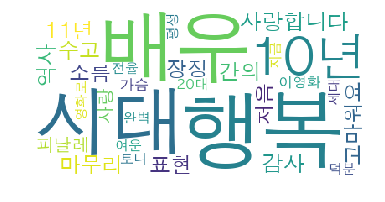

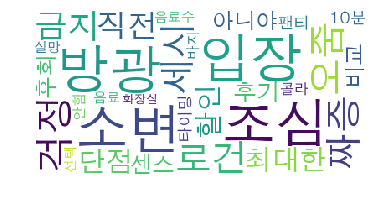

In [27]:
drawCloud(positivePmiList, "")
drawCloud(negativePmiList, "")

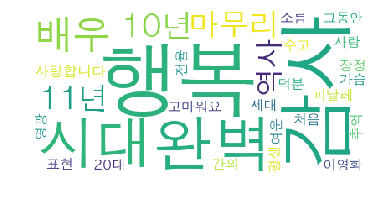

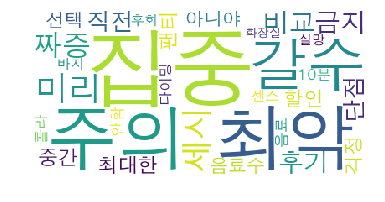

In [28]:
drawCloud(positiveNpmiList, "")
drawCloud(negativeNpmiList, "")

In [69]:
topicDistribution = list(0 for _ in range(K))

for docName, topicList in docTopicDistribution.items():
    sortedTopicList = sorted(topicList.items(), key=lambda x:x[1], reverse=True)
    try:
        topicDistribution[sortedTopicList[0][0]] += 1
    except:
        print(docName, topicList, sortedTopicList)

15551391 defaultdict(<class 'int'>, {}) []


In [66]:
docTopicDistribution[15551391].items()
sorted(docTopicDistribution[15551391].items(), key=lambda x:x[1], reverse=True)[0]

(3, 1)

캐릭터 58.57021364345014 5.087699052516674
스토리 -32.28832608473382 -5.553895769042826
감상평 10.608976100026887 0.8145447643636365
극장(환경) -61.232075633609305 -8.238233348453797
시리즈 55.7753807780785 5.385224136592662
헌정(팬심) 190.85348277149447 22.399693233128943


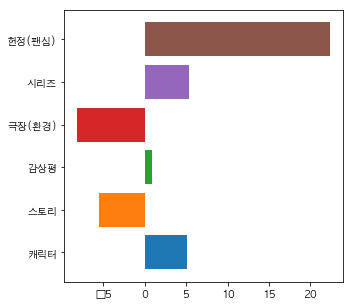

In [101]:
topicTitle = ["캐릭터", "스토리", "감상평", "극장(환경)", "시리즈", "헌정(팬심)"]

for topic in range(K):
    sentimentPMI = 0.0
    sentimentNPMI = 0.0
    
    topicWords = sorted(topicTermDistribution[topic].items(), key=lambda x:x[1], reverse=True)[:40]
    
    for term in topicWords:
        sentimentPMI += pmiSO[term[0]]
        sentimentNPMI += npmiSO[term[0]]
        
    print(topicTitle[topic], sentimentPMI, sentimentNPMI)
    plt.barh(topicTitle[topic], sentimentNPMI)
plt.show()

In [92]:
# import PyPDF2
# pdf_file = open('../../서버정보.pdf', 'rb')
# read_pdf = PyPDF2.PdfFileReader(pdf_file)
# number_of_pages = read_pdf.getNumPages()
# page = read_pdf.getPage(0)
# page_content = page.extractText()
# print(page_content.encode('utf-8'))

# import textract
# text = textract.process("../../서버정보.pdf")

ModuleNotFoundError: No module named 'textract'